<a href="https://colab.research.google.com/github/f-flavia/Titanic/blob/main/Titanic_Analysis_and_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [1]:
# Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mtick
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold


## Explore the data

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Data Analysis

In [11]:
# Quantity of Survived

display(train['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64

Out of the 891 passengers, only 342 managed to survive.

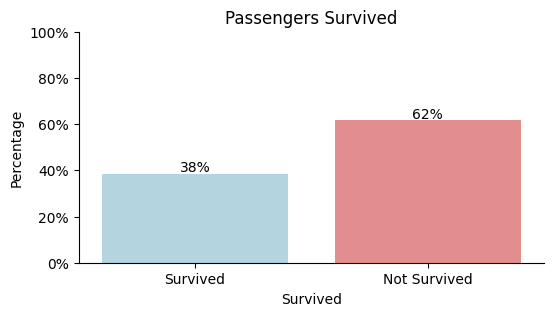

In [12]:
# Plotting passengers that survived

# value_counts(normalize=True) * 100 serves to calculate the relative frequencies or
# proportions of unique values in a column and express them as percentages. By multiplying
# the normalized values by 100, we can represent the distribution of the data in terms of
# percentage values, making it easier to interpret and compare the proportions of different categories or groups.

# Calculate survived percentages
plot_df = train['Survived'].value_counts(normalize=True) * 100
plot_df = plot_df.rename('Percent').reset_index().sort_values('Percent')
plot_df['Survived'] = ['Survived' if i == 1 else 'Not Survived' for i in plot_df['index']]
x = plot_df['Survived']
y = plot_df['Percent']

# Create bar plot using Seaborn with custom colors
fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x=x, y=y, ax=ax, palette=['lightblue', 'lightcoral'])

# Add value labels to the bars
for i, v in enumerate(y):
    ax.text(i, v + 1, f'{v:.0f}%', ha='center')

# Customize the plot
ax.set_title('Passengers Survived')
ax.set_xlabel('Survived')
ax.set_ylabel('Percentage')
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage symbol to y-axis labels
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


Only 38% of the passengers survived.

In [13]:
# Sex
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In the dataset, there are 577 male passengers and 314 female passengers.

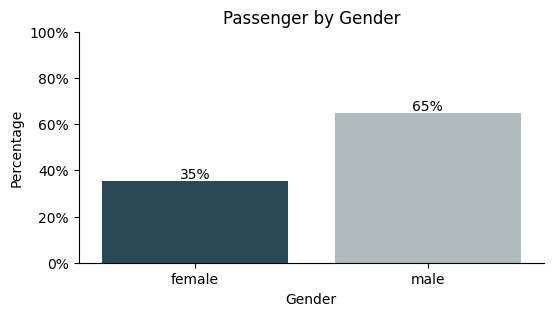

In [14]:
# Plotting percent of passengers by gender

# Calculate gender percentages
plot_df = train['Sex'].value_counts(normalize=True) * 100
plot_df = plot_df.rename('Percent').reset_index().sort_values('Percent')
plot_df.rename(columns={'index': 'Sex'}, inplace=True)

# Create bar plot using Seaborn
fig, ax = plt.subplots(figsize=(6, 3))
sns.barplot(x='Sex', y='Percent', data=plot_df, ax=ax, palette=['#214D5C', '#ACBCC2'])


# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Customize the plot
ax.set_title('Passenger by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Percentage')
ax.set_ylim(0, 100)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add percentage symbol to y-axis labels
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In the dataset, approximately 65% of the passengers are male, while approximately 35% are female.

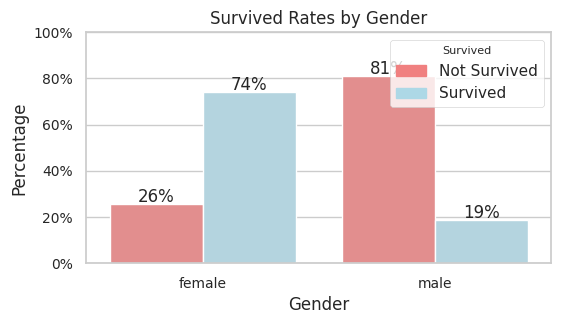

In [15]:
# Plotting survived by gender
plot_df = train.groupby(['Sex'])['Survived'].value_counts(normalize=True) * 100
plot_df = plot_df.rename('Percent').reset_index().sort_values('Sex')

colors = ['lightcoral', 'lightblue']

# Create bar plot using Seaborn with custom colors
sns.set(style="whitegrid")
plt.figure(figsize=(6, 3))
sns.barplot(x="Sex", y="Percent", hue="Survived", data=plot_df, palette=colors)

# Add value labels to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Format y-axis tick labels with percentage symbol
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Customize the plot
plt.title('Survived Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Add legend with colors and labels
legend_labels = ['Not Survived', 'Survived']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
legend = plt.legend(legend_handles, legend_labels, title='Survived')
legend.get_frame().set_linewidth(0.5)
legend.get_title().set_fontsize(8)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Among the passengers, approximately 74% of females survived, while only 19% of males survived.

In [16]:
# Class
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In the dataset, there are 216 passengers in the first class, 184 passengers in the second class and 491 in the third class.

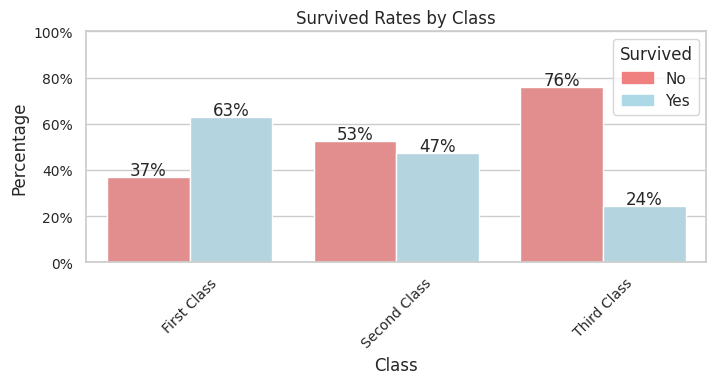

In [17]:
# Plotting survived by class

# Calculate Survived percentages by class
plot_df = train.groupby(['Pclass'])['Survived'].value_counts(normalize=True) * 100
plot_df = plot_df.rename('Percent').reset_index().sort_values('Pclass')

# Create bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(8, 3))
sns.barplot(x="Pclass", y="Percent", hue="Survived", data=plot_df, palette=['lightcoral', 'lightblue'])

# Replace x-axis legend labels
plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'], rotation=45)

# Add value labels to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Format y-axis tick labels with percentage symbol
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Customize the plot
plt.title('Survived Rates by Class')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Add legend with colors and labels
legend_labels = ['No', 'Yes']
plt.legend(legend_handles, legend_labels, title='Survived')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

The survival rate among passengers was 63% in the first class, 47% in the second class, and 24% in the third class.

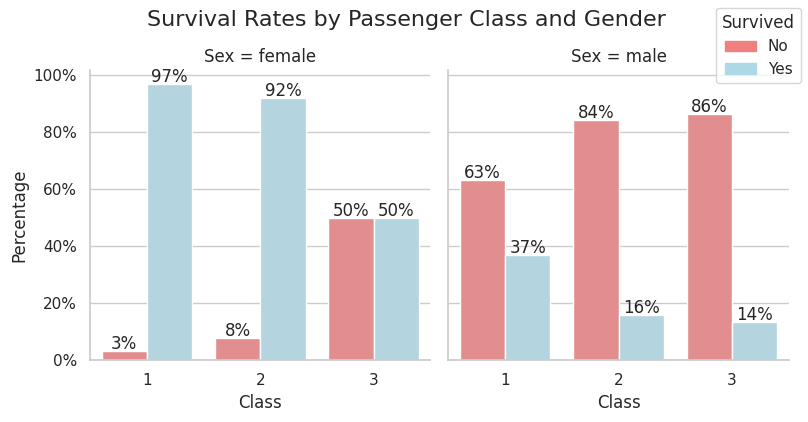

In [18]:
# Plotting Survived by Passenger Class and Gender

# Calculate the percentage of Survived by Pclass and Gender
plot_df = train.groupby(['Pclass', 'Sex'])['Survived'].value_counts(normalize=True) * 100
plot_df = plot_df.rename('Percent').reset_index()

# Set the style
sns.set(style='whitegrid')

# Create subplots for male and female passengers
g = sns.catplot(data=plot_df, x='Pclass', y='Percent', hue='Survived', col='Sex', kind='bar',
                palette=['lightcoral', 'lightblue'], height=4, aspect=1, legend=False)

# Add value labels to the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Format y-axis tick labels with percentage symbol
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Set common x-axis label
g.set_xlabels('Class')

# Set common y-axis label
g.set_ylabels('Percentage')

# Adjust the position of the title
g.fig.suptitle('Survival Rates by Passenger Class and Gender', y=1.05, fontsize=16, ha='center', va='top')

# Add legend with colors and labels
legend_labels = ['No', 'Yes']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in ['lightcoral', 'lightblue']]
g.fig.legend(legend_handles, legend_labels, title='Survived')

# Show the plot
plt.show()



These results indicate a clear trend of higher survival rates among women, particularly in the first and second classes. The survival rates for men are notably lower across all passenger classes. This analysis highlights the gender disparity in survival outcomes during the Titanic tragedy, with women having a significantly higher chance of survival compared to men.

In [19]:
# Embarked
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

It's clear that the majority of people embarked in Southampton (S). Let's go ahead and fill in the missing values with S.

In [20]:
# Fill in the missing values in the Embarked feature

train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

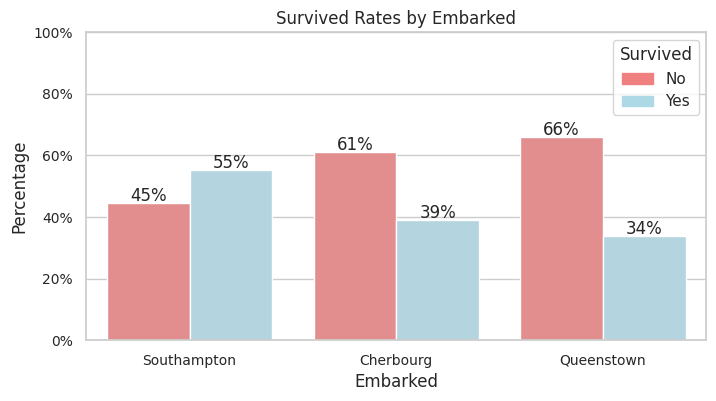

In [21]:
# Plotting survived by Embarked

# Calculate Survived percentages by Embarked
plot_df = train.groupby(['Embarked'])['Survived'].value_counts(normalize=True) * 100
plot_df = plot_df.rename('Percent').reset_index().sort_values('Embarked')

# Create bar plot using Seaborn
sns.set(style="whitegrid")

# Set the colors:
colors = ['lightcoral', 'lightblue']

plt.figure(figsize=(8, 4))
sns.barplot(x="Embarked", y="Percent", hue="Survived", data=plot_df, palette=colors)

# Replace x-axis legend labels
plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], fontsize=10)

# Add value labels to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Format y-axis tick labels with percentage symbol
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Customize the plot
plt.title('Survived Rates by Embarked')
plt.xlabel('Embarked')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Add legend with colors and labels
legend_labels = ['No', 'Yes']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, title='Survived')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()



Based on the analysis of survival rates by the port of embarkation, it can be observed that the highest percentage of survivors is in Southampton with 55%. Cherbourg follows with 39% survivors, while Queenstown has the lowest survival rate of 34%. These findings indicate that the port of embarkation may have had an impact on the likelihood of survival during the Titanic disaster.

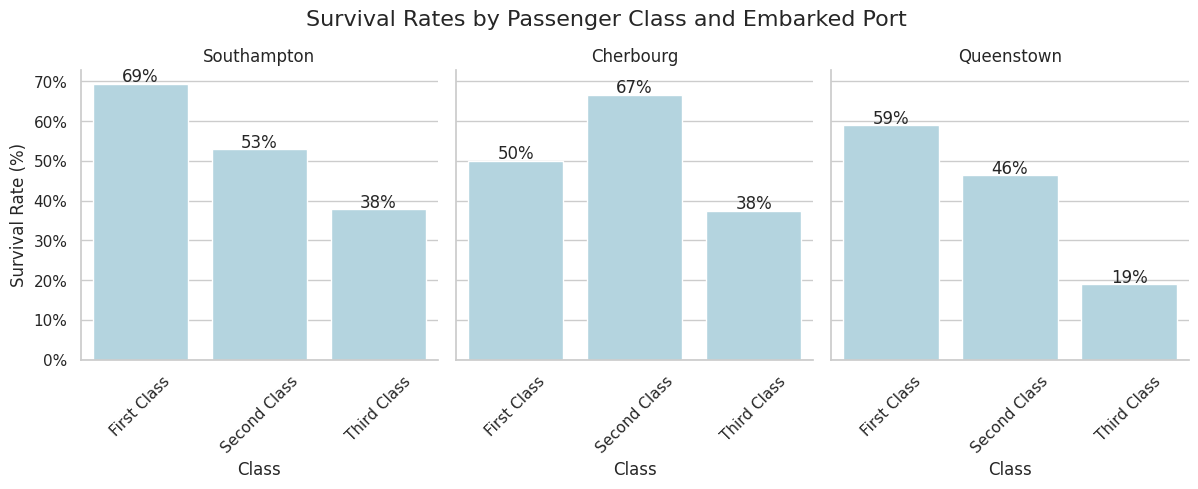

In [22]:
# Calculate the percentage of Survived by Passenger class and Embarked Port

# unstack() is a pandas function used to pivot a hierarchical indexed Series or DataFrame, reshaping it into
# a wide format with new columns created based on the values in the specified index level. It essentially converts
# the index labels into column headers, making the data more accessible and easier to work with for further analysis or visualization.

plot_df = train.groupby(['Pclass', 'Embarked', 'Survived']).size().unstack('Survived')
plot_df['Total'] = plot_df.sum(axis=1)
plot_df = plot_df.div(plot_df['Total'], axis=0).mul(100)
plot_df = plot_df.drop('Total', axis=1).reset_index()

# Set the style
sns.set(style='whitegrid')

# Define custom colors
colors = ['#ADD8E6']

# Create the subplots using Seaborn
g = sns.catplot(data=plot_df, x='Pclass', y=1, col='Embarked', kind='bar', height=4, aspect=1, palette=colors)

# Replace x-axis legend labels
g.set_xticklabels(['First Class', 'Second Class', 'Third Class'], rotation=45)

# Set titles and labels
g.set_axis_labels('Class', 'Survival Rate (%)')

# Add percentage values above the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Format y-axis tick labels with percentage symbol
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Set custom titles for subplots
titles = ['Southampton', 'Cherbourg', 'Queenstown']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

# Adjust the position of the title
g.fig.suptitle('Survival Rates by Passenger Class and Embarked Port', y=1.05, fontsize=16, ha='center', va='top', x=0.5)

# Show the plot
plt.show()



The analysis of survival rates by passenger class and port of embarkation reveals interesting insights. In Southampton, the survival rate is highest among first-class passengers at 69%, followed by second-class passengers at 53%, and third-class passengers at 38%. In Cherbourg, first-class passengers have a survival rate of 50%, second-class passengers have a higher rate of 67%, while third-class passengers have a similar rate of 38%. Queenstown shows a different pattern, with first-class passengers having a survival rate of 59%, second-class passengers at 46%, and the lowest survival rate among third-class passengers at 19%. These findings suggest that the combination of passenger class and port of embarkation played a role in determining the chances of survival during the Titanic tragedy.

In [23]:
# Duplicate the two features to fill in the missing numbers with KNN before training the model.

train['Age_duplicate'] = train['Age']
train['Fare_duplicate'] = train['Fare']
test['Age_duplicate'] = test['Age']
test['Fare_duplicate'] = test['Fare']

In [24]:
# Age

def create_age_groups(data):
    # Handling missing values in the 'Age' column
    data['Age'] = data['Age'].fillna(-1)

    # Defining bins and labels for age groups
    bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
    labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior', 'Elderly']

    # Creating the 'AgeGroup' column based on the 'Age' column
    data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels) #pd.cut() function is used to create the 'AgeGroup' column based on the 'Age' column.

    return data

# Applying the function to the 'train' DataFrame
train = create_age_groups(train)

In [25]:
train["AgeGroup"].value_counts()

Adult          220
Senior         195
Young Adult    138
Teenager        70
Baby            44
Child           25
Elderly         22
Unknown          0
Name: AgeGroup, dtype: int64

The analysis shows the distribution of passengers based on their age groups. Among the analyzed passengers, the majority fall into the "Adult" category with 220 individuals. The "Senior" age group is the second largest with 195 passengers, followed by "Young Adult" with 138 passengers. The "Teenager" group comprises 70 passengers, while the "Baby" and "Child" groups consist of 44 and 25 passengers, respectively. There are 22 passengers classified as "Elderly." It is important to note that there are no passengers with an unknown age group in the analyzed data.

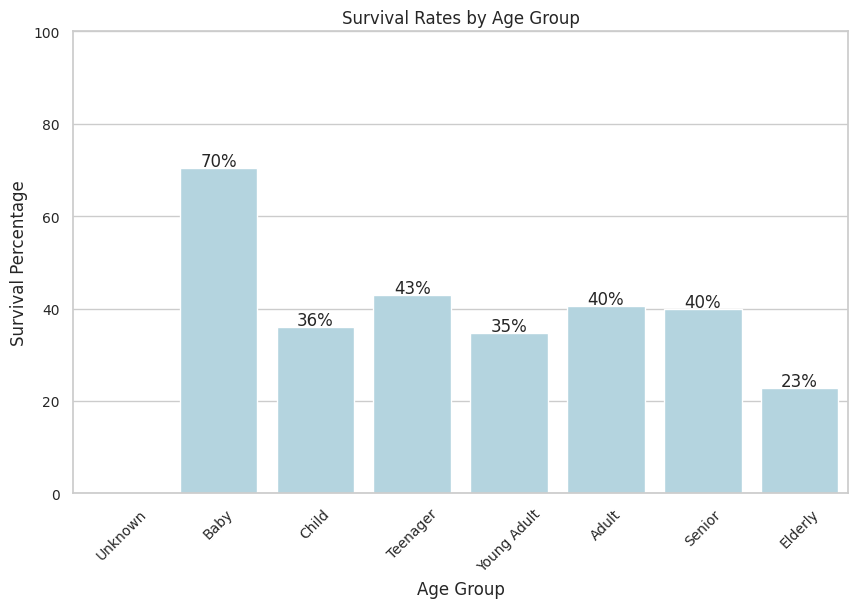

In [26]:
# Plotting survived by Age

# Calculate the number of survivors and total counts in each age group
age_group_counts = train['AgeGroup'].value_counts()
survived_counts = train.groupby('AgeGroup')['Survived'].sum()

# Calculate the survival percentages
survival_percentages = (survived_counts / age_group_counts) * 100

# Define custom colors
colors = ['#ADD8E6']

# Create bar plot using Seaborn with custom color palette
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=survival_percentages.index, y=survival_percentages, palette=colors)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Customize the plot
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Percentage')
plt.ylim(0, 100)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()



The analysis reveals the survival rates based on different age groups. Among the analyzed age groups, babies had the highest survival rate at 70%. Children had a survival rate of 36%, while teenagers had a slightly higher survival rate of 43%. Young adults and adults had similar survival rates of 35% and 40%, respectively. The survival rate for seniors was also 40%. However, the elderly age group had a comparatively lower survival rate of 23%. These findings highlight variations in survival rates based on different age categories during the incident.

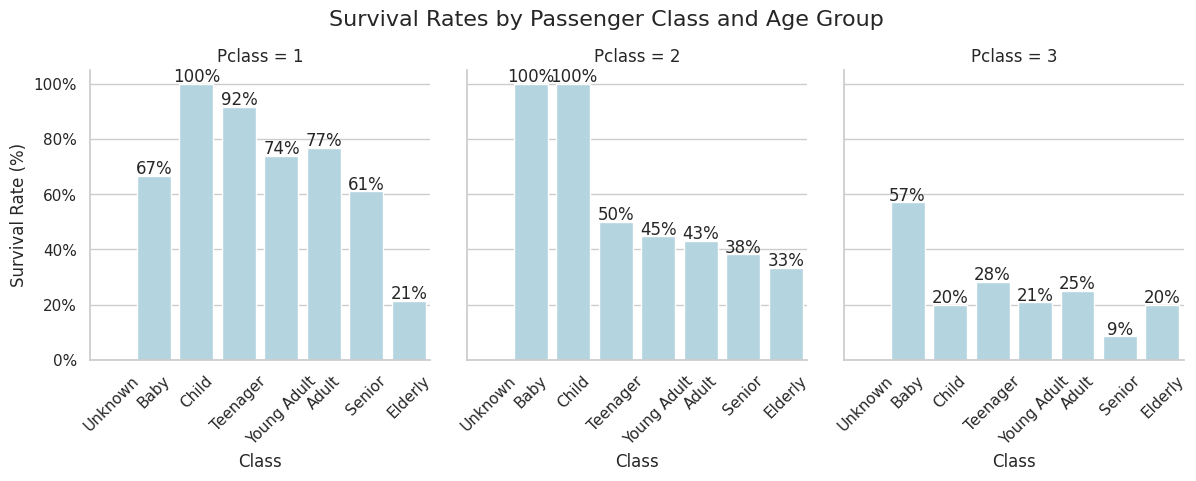

In [27]:
# Plotting survived by Age Group and Passenger class

# Calculate the percentage of Survived by Pclass and Age
plot_df = train.groupby(['Pclass', 'AgeGroup', 'Survived']).size().unstack('Survived')
plot_df['Total'] = plot_df.sum(axis=1)
plot_df = plot_df.div(plot_df['Total'], axis=0).mul(100)
plot_df = plot_df.drop('Total', axis=1).reset_index()

# Set the style
sns.set(style='whitegrid')

# Define custom colors
colors = ['#ADD8E6']

# Create the subplots using Seaborn
g = sns.catplot(data=plot_df, x='AgeGroup', y=1, col='Pclass', kind='bar', height=4, aspect=1, palette=colors)

# Set titles and labels
g.set_axis_labels('Class', 'Survival Rate (%)')

# Add percentage values above the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Format y-axis tick labels with percentage symbol
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Adjust the position of the title
g.fig.suptitle('Survival Rates by Passenger Class and Age Group', y=1.05, fontsize=16, ha='center', va='top', x=0.5)

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Show the plot
plt.show()

The analysis shows that the survival rates varied across different age groups within each passenger class. Babies and children generally had higher survival rates, especially in the first and second classes. Teenagers and young adults had varying survival rates depending on the passenger class. The elderly generally had lower survival rates across all passenger classes.

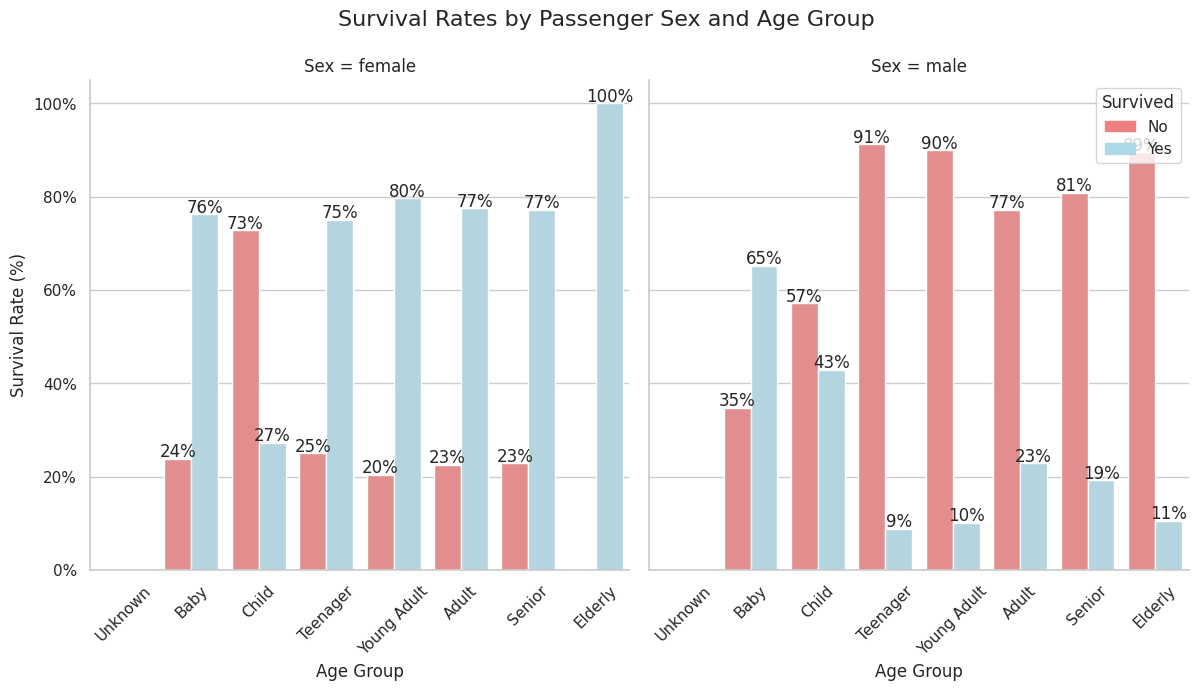

In [28]:
# Calculate the percentage of Survived by Sex and AgeGroup
plot_df = train.groupby(['Sex', 'AgeGroup'])['Survived'].value_counts(normalize=True) * 100
plot_df = plot_df.rename('Percent').reset_index()

# Set the style
sns.set(style='whitegrid')

# Define custom colors
colors = ['lightcoral', 'lightblue']

# Create the subplots using Seaborn
g = sns.catplot(data=plot_df, x='AgeGroup', y='Percent', hue='Survived', col='Sex', kind='bar', height=6, aspect=1, palette=colors, legend=False)

# Set titles and labels
g.set_axis_labels('Age Group', 'Survival Rate (%)')

# Add percentage values above the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Format y-axis tick labels with percentage symbol
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Adjust the position of the title
g.fig.suptitle('Survival Rates by Passenger Sex and Age Group', y=1.05, fontsize=16, ha='center', va='top', x=0.5)

# Rotate x-axis labels
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Add legend with colors and labels
legend_labels = ['No', 'Yes']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, title='Survived')

# Show the plot
plt.show()


The analysis reveals that females had higher survival rates across all age groups, with the highest rates observed among the elderly (100%), babies (76%), and young adults (80%). In contrast, males had lower survival rates, with teenagers (9%) and young adults (10%) experiencing the lowest rates. These findings emphasize the influence of both gender and age group on survival during the event. Females, particularly the elderly, had better chances of survival, while males, especially teenagers and young adults, faced greater challenges.

In [29]:
train["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

The analysis shows the distribution of the number of siblings/spouses aboard the Titanic. Most passengers (608) did not have any siblings or spouses aboard. A significant number of passengers (209) had one sibling or spouse, followed by a smaller number (28) with two. There were fewer passengers with three, four, five, and eight siblings/spouses aboard, with the numbers decreasing further for higher counts.

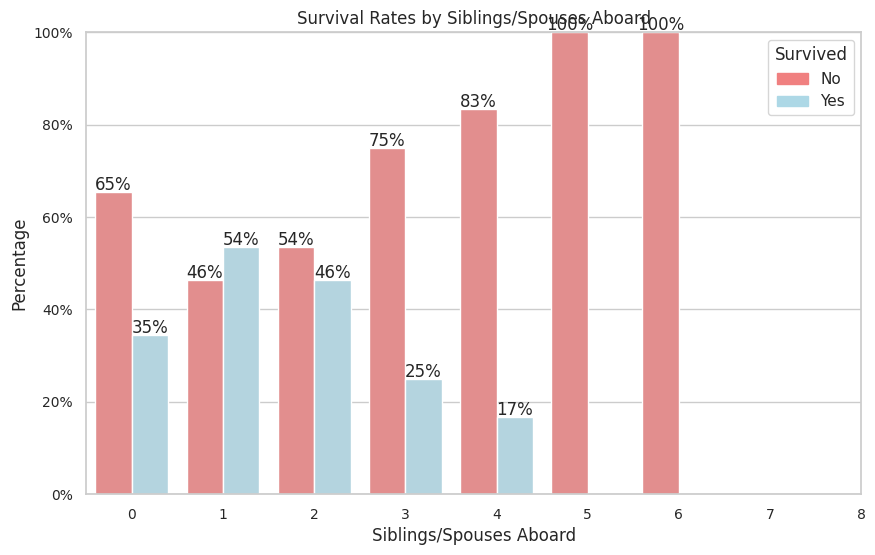

In [30]:
# Calculate survival percentages by Siblings/Spouses Aboard

plot_df = train.groupby(['SibSp'])['Survived'].value_counts(normalize=True) * 100
plot_df = plot_df.rename('Percent').reset_index().sort_values('SibSp')

# Set the style
sns.set(style='whitegrid')

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='SibSp', y='Percent', hue='Survived', data=plot_df, palette=colors)

# Replace x-axis legend labels
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=10)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Format y-axis tick labels with percentage symbol
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Customize the plot
plt.title('Survival Rates by Siblings/Spouses Aboard')
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Add legend with colors and labels
legend_labels = ['No', 'Yes']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, title='Survived')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


Interestingly, passengers with no Siblings/Spouses Aboard (SibSp = 0) had a lower survival rate, with only around 35% of them surviving. As the number of Siblings/Spouses Aboard increased, the survival rates varied. Passengers with one or two Siblings/Spouses Aboard had relatively higher survival rates, ranging from around 45% to 50%. However, the survival rates sharply declined for passengers with larger families (SibSp > 2), with rates dropping to approximately 20% or lower.

This analysis highlights the impact of the number of Siblings/Spouses Aboard on the chances of survival. Passengers traveling alone or with a small family had better survival odds compared to those with larger families.

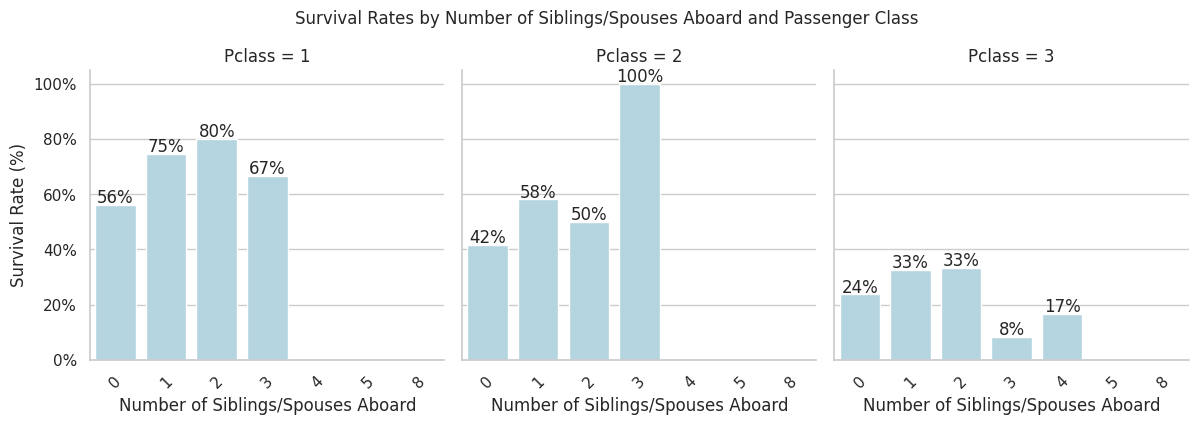

In [31]:
# Plotting Survived by Class and Siblings/Spouses Aboard

# Calculate the percentage of Survived by Pclass and SibSp
plot_df = train.groupby(['SibSp', 'Pclass', 'Survived']).size().unstack('Survived')
plot_df['Total'] = plot_df.sum(axis=1)
plot_df = plot_df.div(plot_df['Total'], axis=0).mul(100)
plot_df = plot_df.drop('Total', axis=1).reset_index()

# Set the style
sns.set(style='whitegrid')

# Set the color
colors = ['#ADD8E6']

# Create the subplots using Seaborn
g = sns.catplot(data=plot_df, x='SibSp', y=1, col='Pclass', kind='bar', height=4, aspect=1, palette=colors)

# Set titles and labels
g.set_axis_labels('Number of Siblings/Spouses Aboard', 'Survival Rate (%)')

# Rotate x-axis labels
g.set_xticklabels(rotation=45)

# Add percentage values above the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Format y-axis tick labels with percentage symbol
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Adjust the position of the title
g.fig.suptitle('Survival Rates by Number of Siblings/Spouses Aboard and Passenger Class', y=1.05, fontsize=12, ha='center', va='top', x=0.5)

# Show the plot
plt.show()



The analysis reveals that survival rates varied based on passenger class and the number of siblings/spouses aboard. Here are the key findings:

First-class passengers generally had higher survival rates compared to second and third-class passengers.
Among first-class passengers, those with 2 siblings/spouses aboard had the highest survival rate (80%).
Second-class passengers had moderate survival rates, with those with 3 siblings/spouses aboard having a 100% survival rate.
Third-class passengers had the lowest survival rates overall, and the presence of siblings/spouses aboard did not significantly affect their survival rates.
In summary, passenger class played a significant role in determining survival probabilities on the Titanic. First-class passengers had better survival chances, while the impact of the number of siblings/spouses aboard varied across classes.

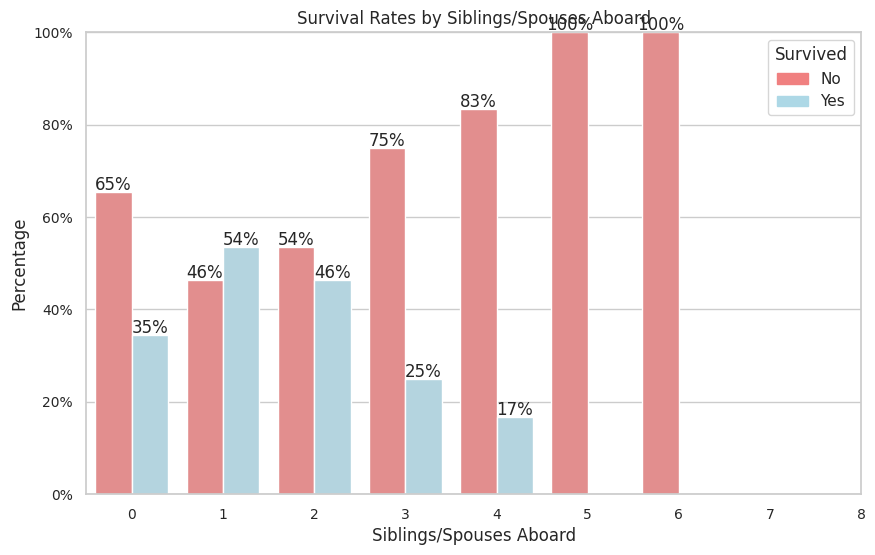

In [32]:
# Plotting survived by Number of Parents/Children.

# Calculate survival percentages by Siblings/Spouses Aboard
plot_df = train.groupby(['SibSp'])['Survived'].value_counts(normalize=True) * 100
plot_df = plot_df.rename('Percent').reset_index().sort_values('SibSp')

# Set the style
sns.set(style='whitegrid')

# Define custom colors
colors = ['lightcoral', 'lightblue']

# Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='SibSp', y='Percent', hue='Survived', data=plot_df, palette=colors)

# Replace x-axis legend labels
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['0', '1', '2', '3', '4', '5', '6', '7', '8'], fontsize=10)

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Format y-axis tick labels with percentage symbol
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Customize the plot
plt.title('Survival Rates by Siblings/Spouses Aboard')
plt.xlabel('Siblings/Spouses Aboard')
plt.ylabel('Percentage')
plt.ylim(0, 100)

# Add legend with colors and labels
legend_labels = ['No', 'Yes']
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
plt.legend(legend_handles, legend_labels, title='Survived')

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


The analysis of the survival rates based on the number of parents/children (Parch) reveals that individuals with fewer than four parents or children aboard the Titanic had a higher likelihood of survival compared to those with four or more. Furthermore, passengers traveling alone, without any parents or children, had a lower survival rate compared to those accompanied by 1-3 parents or children.

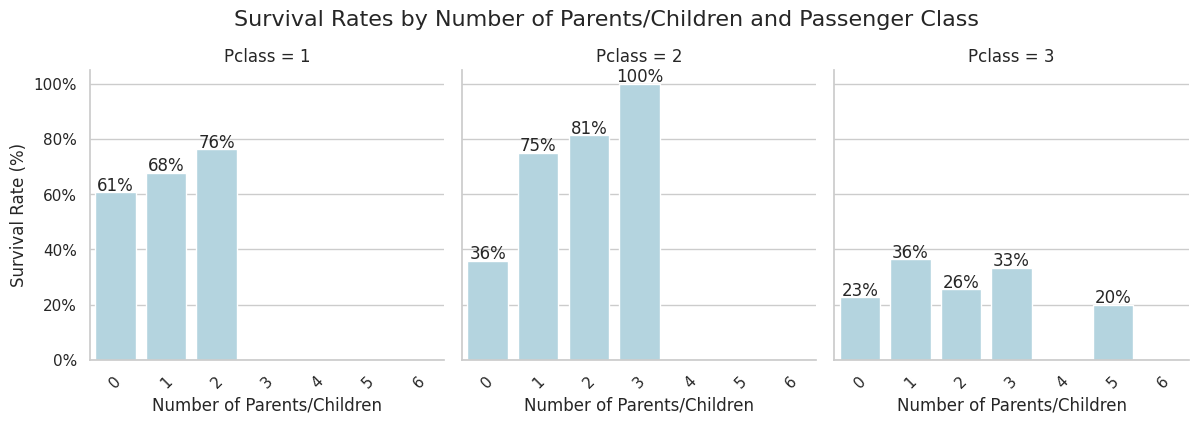

In [33]:
# Calculate the percentage of Survived by Passenger Class and Number of Parents/Children and Passenger Class

plot_df = train.groupby(['Pclass', 'Parch', 'Survived']).size().unstack('Survived')
plot_df['Total'] = plot_df.sum(axis=1)
plot_df = plot_df.div(plot_df['Total'], axis=0).mul(100)
plot_df = plot_df.drop('Total', axis=1).reset_index()

# Set the style
sns.set(style='whitegrid')

# Set the color
colors = ['#ADD8E6']

# Create the subplots using Seaborn
g = sns.catplot(data=plot_df, x='Parch', y=1, col='Pclass', kind='bar', height=4, aspect=1, palette=colors)

# Set titles and labels
g.set_axis_labels('Number of Parents/Children', 'Survival Rate (%)')

# Rotate x-axis labels
g.set_xticklabels(rotation=45)

# Add percentage values above the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Format y-axis tick labels with percentage symbol
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Adjust the position of the title
g.fig.suptitle('Survival Rates by Number of Parents/Children and Passenger Class', y=1.05, fontsize=16, ha='center', va='top', x=0.5)

# Show the plot
plt.show()

The analysis reveals that the survival rates varied based on the number of parents/children aboard and passenger class. Overall, passengers with a higher number of parents/children aboard tended to have higher survival rates. Second-class passengers generally had higher survival rates compared to first and third-class passengers, regardless of the number of parents/children aboard.

Descriptive statistics for the fare column

We calculate descriptive statistics for the fare column to understand the distribution and characteristics of the fare data. These statistics provide information about the average fare, spread of fare values, and the presence of extreme values. It helps us get an overall idea of the fare distribution in the dataset.

In [34]:
# Calculate descriptive statistics for the fare column

fare_stats = train['Fare'].describe()

# Extract specific statistics
fare_mean = fare_stats['mean']
fare_median = fare_stats['50%']  # Equivalent to the median
fare_min = fare_stats['min']
fare_max = fare_stats['max']
fare_std = fare_stats['std']

# Print the descriptive statistics
print("Descriptive Statistics for Fare:")
print(f"Mean: {fare_mean:.2f}")
print(f"Median: {fare_median:.2f}")
print(f"Minimum: {fare_min:.2f}")
print(f"Maximum: {fare_max:.2f}")
print(f"Standard Deviation: {fare_std:.2f}")

Descriptive Statistics for Fare:
Mean: 32.20
Median: 14.45
Minimum: 0.00
Maximum: 512.33
Standard Deviation: 49.69


The fare statistics show that the average fare is 32.20, with a minimum fare of 0.00 and a maximum fare of 512.33. The median fare, which represents the middle value, is 14.45. The standard deviation is approximately $49.69, indicating some variability in the fare values from the mean.

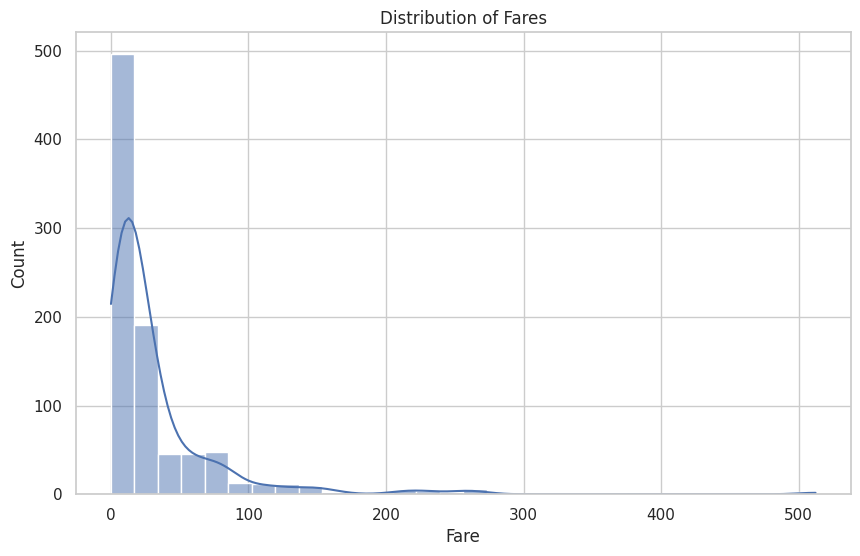

In [35]:
# Distribution of Fares

# Set the style
sns.set(style='whitegrid')

# Create the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='Fare', bins=30, kde=True)

# Customize the plot
plt.title('Distribution of Fares')
plt.xlabel('Fare')
plt.ylabel('Count')

# Show the plot
plt.show()



The fare column in the Titanic dataset represents the ticket fare paid by passengers.

The fare analysis shows a wide range of values, with an average fare of approximately 32.20.
Most passengers paid fares below 31.00, but there are some outliers with fares exceeding $512.33. The fare distribution is slightly right-skewed, indicating that a majority of passengers paid lower fares.

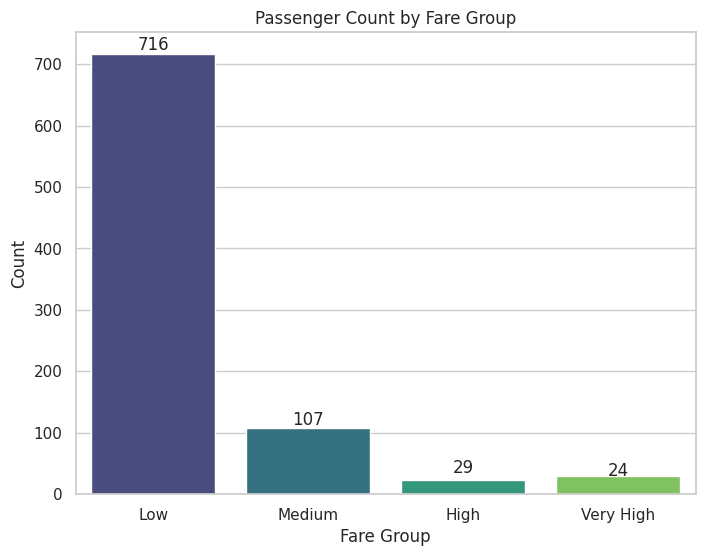

In [36]:
# Passenger Count by Fare Group

# Define the fare ranges and labels for each group
fare_ranges = [0, 50, 100, 150, np.inf]
fare_labels = ['Low', 'Medium', 'High', 'Very High']

# Add a new column to the DataFrame with the fare group
train['FareGroup'] = pd.cut(train['Fare'], bins=fare_ranges, labels=fare_labels)

# Count the number of passengers in each fare group
fare_counts = train['FareGroup'].value_counts()

# Create a bar plot to visualize the fare distribution
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=fare_counts.index, y=fare_counts.values, palette='viridis')

# Set the labels and title
plt.xlabel('Fare Group')
plt.ylabel('Count')
plt.title('Passenger Count by Fare Group')

# Add the values above the bars
for i, v in enumerate(fare_counts.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot
plt.show()


The fare distribution among passengers can be summarized as follows: 716 passengers in the "Low" fare group, 107 passengers in the "Medium" fare group, 29 passengers in the "High" fare group, and 24 passengers in the "Very High" fare group.

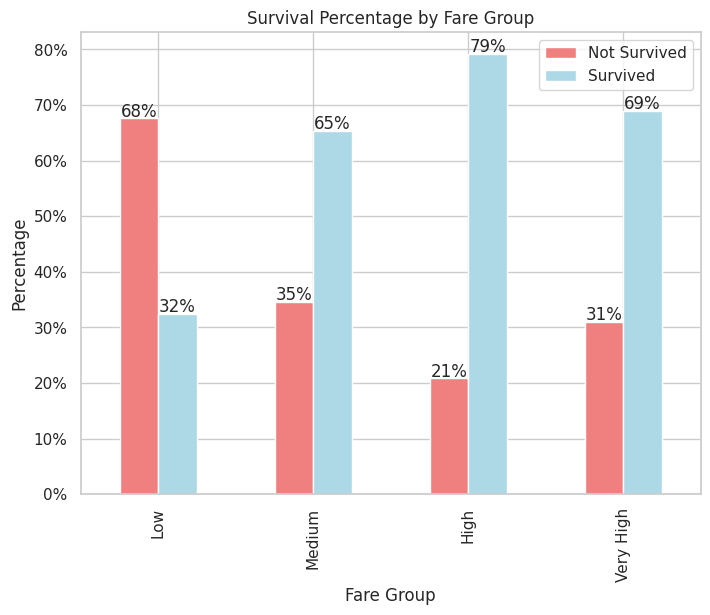

In [37]:
# Survived Passenger by Fare Group

# Calculate the count of passengers for each FareGroup and Survived
fare_survived_counts = train.groupby(['FareGroup', 'Survived']).size().unstack('Survived')

# Calculate the percentage of passengers who survived within each FareGroup
total_passengers = fare_survived_counts.sum(axis=1)
fare_survived_percentages = fare_survived_counts.div(total_passengers, axis=0) * 100

# Set the style
sns.set(style='whitegrid')

# Create the bar plot using Seaborn
ax = fare_survived_percentages.plot(kind='bar', stacked=False, color=['lightcoral', 'lightblue'], figsize=(8, 6))

# Set titles and labels
plt.title('Survival Percentage by Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Percentage')

# Format y-axis tick labels with percentage symbol
ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Add values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Add legend with labels
legend_labels = ['Not Survived', 'Survived']
plt.legend(legend_labels)

# Show the plot
plt.show()



The survival rates among different fare groups are as follows: 32% of passengers in the "Low" fare group survived, 65% of passengers in the "Medium" fare group survived, 79% of passengers in the "High" fare group survived, and 69% of passengers in the "Very High" fare group survived. This suggests that there is a positive correlation between fare group and survival rate, with higher fare groups having higher chances of survival.

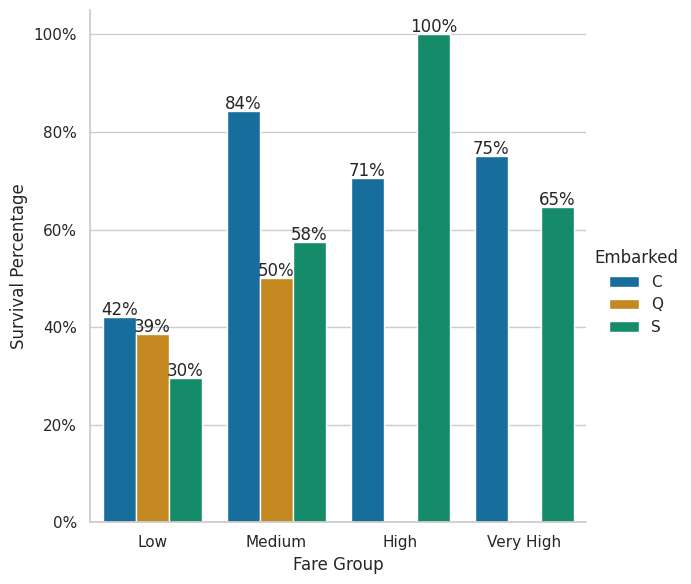

In [38]:
# Calculate the count of passengers for each FareGroup, Embarked, and Survived
fare_embarked_survived_counts = train.groupby(['FareGroup', 'Embarked', 'Survived']).size().unstack('Survived')

# Calculate the percentage of passengers who survived within each FareGroup and Embarked
total_passengers = fare_embarked_survived_counts.sum(axis=1)
fare_embarked_survived_percentages = fare_embarked_survived_counts.div(total_passengers, axis=0) * 100

# Set the style
sns.set(style='whitegrid')

# Create subplots using Seaborn
g = sns.catplot(data=fare_embarked_survived_percentages.reset_index(), x='FareGroup', y=1,
                hue='Embarked', kind='bar', palette='colorblind', height=6, aspect=1)

# Set titles and labels
g.set_titles('Embarked {col_name}')
g.set_axis_labels('Fare Group', 'Survival Percentage')

# Format y-axis tick labels with percentage symbol
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mticker.PercentFormatter())

# Add values above the bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.show()


Survival rates by FareGroup and Embarked:

Low FareGroup: Cherbourg 42%, Queenstown 39%, Southampton 30%

Medium FareGroup: Cherbourg 84%, Queenstown 50%, Southampton 58%

High FareGroup: Cherbourg 71%, Southampton 100%

Very High FareGroup: Cherbourg 75%, Southampton 65%

Survival rates vary based on FareGroup and the port of embarkation. Higher FareGroups generally have higher survival rates. Notably, the highest survival rate is observed in the High FareGroup among passengers embarked in Southampton.

## Data Analysis Conclusion

In conclusion, the analysis of the Titanic train dataset provides valuable insights into the factors that influenced the survival rates of passengers. The analysis reveals significant disparities in survival rates based on gender, passenger class, age group, number of siblings/spouses aboard, number of parents/children aboard, and fare group.

Firstly, there is a clear gender disparity in survival outcomes, with approximately 74% of females surviving compared to only 19% of males. This highlights the priority given to women during the rescue efforts.

Passenger class also played a significant role in survival rates, with first-class passengers having the highest survival rate of 63%, followed by second-class passengers at 47%, and third-class passengers at 24%. The higher survival rates among first-class passengers may be attributed to their proximity to lifeboats and better access to safety measures.

Age group analysis reveals variations in survival rates. Babies had the highest survival rate at 70%, while the elderly had a lower survival rate of 23%. Females across age groups generally had higher survival rates compared to males, emphasizing the importance of age and gender in survival outcomes.

The number of siblings/spouses aboard influenced survival rates, with passengers traveling alone or with a small family having better survival odds compared to those with larger families. Passenger class also influenced survival rates in relation to the number of siblings/spouses aboard.

Similarly, the number of parents/children aboard affected survival rates, with individuals accompanied by fewer than four parents or children having a higher likelihood of survival. Second-class passengers generally had higher survival rates regardless of the number of parents/children aboard.

The fare analysis highlights a positive correlation between fare group and survival rate. Passengers in higher fare groups had higher chances of survival. Survival rates also varied based on the port of embarkation, with Southampton having the highest survival rate among passengers in the High FareGroup.

Overall, this analysis emphasizes the complex interplay of multiple factors in determining the survival rates of passengers on the Titanic. Gender, passenger class, age group, family size, fare group, and port of embarkation all had significant influences. These findings provide valuable insights into the tragic event and contribute to a better understanding of the factors that affected survival during the Titanic disaster.

## Numeric Missing Values

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    object  
 4   Sex             891 non-null    object  
 5   Age             891 non-null    float64 
 6   SibSp           891 non-null    int64   
 7   Parch           891 non-null    int64   
 8   Ticket          891 non-null    object  
 9   Fare            891 non-null    float64 
 10  Cabin           204 non-null    object  
 11  Embarked        891 non-null    object  
 12  Age_duplicate   714 non-null    float64 
 13  Fare_duplicate  891 non-null    float64 
 14  AgeGroup        714 non-null    category
 15  FareGroup       876 non-null    category
dtypes: category(2), float64(4), int64(5), object(5)
memory usage: 

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     418 non-null    int64  
 1   Pclass          418 non-null    int64  
 2   Name            418 non-null    object 
 3   Sex             418 non-null    object 
 4   Age             332 non-null    float64
 5   SibSp           418 non-null    int64  
 6   Parch           418 non-null    int64  
 7   Ticket          418 non-null    object 
 8   Fare            417 non-null    float64
 9   Cabin           91 non-null     object 
 10  Embarked        418 non-null    object 
 11  Age_duplicate   332 non-null    float64
 12  Fare_duplicate  417 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 42.6+ KB


KNN

We should use the `knn_impute` function because it provides an effective and data-driven method to fill missing values in numeric columns using the k-Nearest Neighbors (KNN) regression technique. KNN imputation is a valuable tool in data preprocessing, and this function simplifies the process by automating the imputation for each specified column.
Overall, the `knn_impute` function provides an automated and data-driven approach to handle missing values in numeric columns, contributing to a more complete and accurate dataset for subsequent analyses or machine learning tasks.

In [41]:
# KNN

def knn_impute(df, na_target): # this will take in a data frame and a column and it
                               # wil return the same data frame with the columns
                               # missing values filled in
    df = df.copy()
 # when working with data frame we can just use the numeric columns to calculate knn
    numeric_df = df.select_dtypes(np.number) # numeric columns
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns # columns with no missing values

    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target] # all the values that are not missing in the target column
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns] # the rest of the data that the model
                                                                                    # is going to be using to try to
                                                                                    # predict the value to impute
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns] # there is a missing value

    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test) # these are the values we're using as the imputation

    df.loc[df[na_target].isna() == True, na_target] = y_pred # this is all the values in na_target that have missing values
                                                             # y_pred fill in all the missing values in the na_target using the predictions

    return df

In [42]:
# this will fill all the missing values in each of the numeric variables using this knn imputation strategy
for column in ['Age_duplicate']:
    train = knn_impute(train, column)

In [43]:
# this will fill all the missing values in each of the numeric variables using this knn imputation strategy
for column in ['Age_duplicate', 'Fare_duplicate']:
    test = knn_impute(test, column)

In [44]:
# Converts the 'Age_duplicate' and 'Fare_duplicate' columns to 64-bit integers
train[['Age_duplicate', 'Fare_duplicate']] = train[['Age_duplicate', 'Fare_duplicate']].astype(np.int64)
test[['Age_duplicate', 'Fare_duplicate']] = test[['Age_duplicate', 'Fare_duplicate']].astype(np.int64)


Sex

Transforming the "Sex" feature into binary encoding is a useful preprocessing step that facilitates working with categorical data in machine learning algorithms. It provides numerical representation, ensures compatibility with certain algorithms, avoids multicollinearity, and maintains simplicity and interpretability in the model.

In [45]:
# Transform Sex into binary

def transform_sex(value):
    if value == 'female':
        return 1
    else:
        return 0

train['Sex_binary'] = train['Sex'].map(transform_sex)

In [46]:
test['Sex_binary'] = test['Sex'].map(transform_sex)

Name

The code provided performs feature engineering on the 'Name' column in the 'train' and 'test' datasets by extracting titles from each name and then converting them into numerical values.
Overall, this feature engineering process enhances the dataset's predictive power by transforming textual information from names into numerical values that can be used effectively by machine learning models. The resulting 'Title' column provides a more compact, meaningful, and informative representation of passenger titles, making it easier for algorithms to identify patterns and make predictions related to survival on the Titanic.

In [47]:
# Name
# Extract a title for each Name in the train dataset
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False) # ([A-Za-z]+)is used to find patterns in the 'Name'
                                                                           # column that match a word followed by a dot

pd.crosstab(train['Title'], train['Sex']) # to create a cross-tabulation or contingency table.
                                          # It displays how many males and females are associated with each title in the 'Title' column.

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [48]:
# Replace various titles with more common names

train['Title'] = train['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace(['Countess', 'Sir'], 'Royal')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

# Map each of the title groups to a numerical value

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

train['Title'] = train['Title'].map(title_mapping)

In [49]:
# Name
# Extract a title for each Name in the test dataset

test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(test['Title'], test['Sex']) # Show the table

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


In [50]:
# Replace various titles with more common names

test['Title'] = test['Title'].replace(['Lady', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace(['Countess', 'Sir'], 'Royal')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

# Map each of the title groups to a numerical value

title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}

test['Title'] = test['Title'].map(title_mapping)

Embarked

This code will map the values 'S', 'C', and 'Q' in the 'Embarked' column to the corresponding numerical values 1, 2, and 3, respectively. This transformation is useful for converting categorical variables into numerical representations, which can be used by machine learning models for analysis and prediction.

In [51]:
# Map each of the title groups to a numerical value

title_mapping = {"S": 1, "C": 2, "Q": 3}

train['Embarked'] = train['Embarked'].map(title_mapping)

In [52]:
# Map each of the title groups to a numerical value

title_mapping = {"S": 1, "C": 2, "Q": 3}

test['Embarked'] = test['Embarked'].map(title_mapping)

Drop Columns

By dropping these columns, we have prepared the data for modeling, ensuring that we have relevant and complete features to build predictive models. This can improve the performance of machine learning algorithms and make the data more manageable for analysis.

In [53]:
# Drop columns from the DataFrame
train = train.drop(['Name', 'Sex', 'Age', 'Fare', 'AgeGroup', 'FareGroup', 'Ticket', 'Cabin'], axis=1)
test = test.drop(['Name', 'Sex', 'Age', 'Fare', 'Ticket', 'Cabin'], axis=1)

In [54]:
train.isna().sum()

PassengerId       0
Survived          0
Pclass            0
SibSp             0
Parch             0
Embarked          0
Age_duplicate     0
Fare_duplicate    0
Sex_binary        0
Title             0
dtype: int64

In [55]:
test.isna().sum()

PassengerId       0
Pclass            0
SibSp             0
Parch             0
Embarked          0
Age_duplicate     0
Fare_duplicate    0
Sex_binary        0
Title             0
dtype: int64

In [56]:
display(train.head())

,PassengerId,Survived,Pclass,SibSp,Parch,Embarked,Age_duplicate,Fare_duplicate,Sex_binary,Title
0,1,0,3,1,0,1,22,7,0,1
1,2,1,1,1,0,2,38,71,1,3
2,3,1,3,0,0,1,26,7,1,2
3,4,1,1,1,0,1,35,53,1,3
4,5,0,3,0,0,1,35,8,0,1


In [57]:
display(test.head())

,PassengerId,Pclass,SibSp,Parch,Embarked,Age_duplicate,Fare_duplicate,Sex_binary,Title
0,892,3,0,0,3,34,7,0,1
1,893,3,1,0,1,47,7,1,3
2,894,2,0,0,3,62,9,0,1
3,895,3,0,0,1,27,8,0,1
4,896,3,1,1,1,22,12,1,3


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PassengerId     891 non-null    int64
 1   Survived        891 non-null    int64
 2   Pclass          891 non-null    int64
 3   SibSp           891 non-null    int64
 4   Parch           891 non-null    int64
 5   Embarked        891 non-null    int64
 6   Age_duplicate   891 non-null    int64
 7   Fare_duplicate  891 non-null    int64
 8   Sex_binary      891 non-null    int64
 9   Title           891 non-null    int64
dtypes: int64(10)
memory usage: 69.7 KB


In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PassengerId     418 non-null    int64
 1   Pclass          418 non-null    int64
 2   SibSp           418 non-null    int64
 3   Parch           418 non-null    int64
 4   Embarked        418 non-null    int64
 5   Age_duplicate   418 non-null    int64
 6   Fare_duplicate  418 non-null    int64
 7   Sex_binary      418 non-null    int64
 8   Title           418 non-null    int64
dtypes: int64(9)
memory usage: 29.5 KB


The Spearman correlation

The Spearman correlation is a non-parametric measure of correlation that assesses the strength and direction of monotonic relationships between variables. It is particularly useful when dealing with ordinal or non-linear relationships between variables, as it does not assume any specific distribution of the data.

In the context of the Titanic dataset, the Spearman correlation may be preferred over the Pearson correlation (which measures linear relationships) for the following reasons:

1. Non-linear Relationships: The relationships between variables in the Titanic dataset may not necessarily be linear. For example, the relationship between age and survival might not follow a straight line. The Spearman correlation can capture non-linear associations better than the Pearson correlation.

2. Ordinal Variables: The dataset contains ordinal variables like 'Pclass' and 'Title'. These variables have a natural order, but the interval between the categories may not be equal. The Spearman correlation is well-suited for handling ordinal data.

3. Outliers: The Spearman correlation is robust to outliers because it relies on the rank-order of the data rather than the actual values. This is important as some variables in the Titanic dataset may have outliers.

4. Small Sample Size: The Spearman correlation is less sensitive to sample size compared to the Pearson correlation. This is beneficial when dealing with smaller datasets like the Titanic dataset.

Overall, the Spearman correlation provides a more comprehensive measure of association for the Titanic dataset, capturing both linear and non-linear relationships while accommodating the ordinal nature of certain variables.

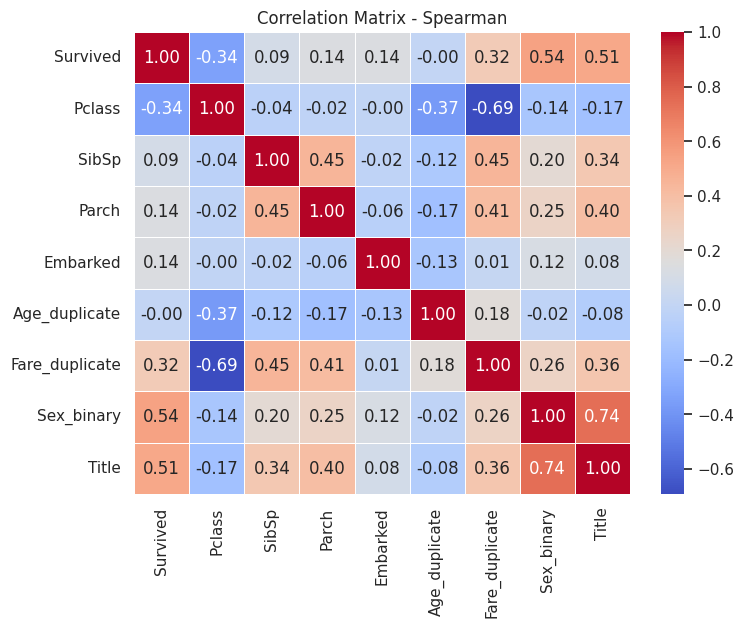

In [60]:
# DataFrame with the numeric variables
data_corr = train[['Survived', 'Pclass', 'SibSp', 'Parch', 'Embarked', 'Age_duplicate', 'Fare_duplicate', 'Sex_binary', 'Title']]

# Calculate the Spearman correlation matrix
correlation_matrix = data_corr.corr(method='spearman')

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Spearman')
plt.show()


Analysis of Spearman Correlations:

In this analysis, we examined the Spearman correlations between various features in the dataset and the target variable "Survived," which represents whether a passenger survived the Titanic disaster. Spearman correlation is a non-linear correlation measure that assesses the monotonic relationship between variables.

Here are some key findings:

1. **Age_duplicate vs. Pclass (-0.37) and Fare_duplicate vs. Pclass (-0.69):** Both age and fare (duplicated versions) have moderate to strong negative correlations with passenger class. This indicates that older passengers tend to be in lower classes, and higher-class passengers paid higher fares.

2. **Fare_duplicate vs. SibSp (-0.45) and Fare_duplicate vs. Parch (-0.41):** The duplicated fare has moderate negative correlations with the number of siblings/spouses and the number of parents/children aboard. Passengers with more family members tended to pay lower fares.

3. **Parch vs. SibSp (0.45):** There is a moderate positive correlation between the number of parents/children and the number of siblings/spouses aboard. Passengers with more siblings/spouses were more likely to have more parents/children.

4. **Title vs. Parch (0.40) and Title vs. Sex_binary (0.74):** Passenger titles show moderate to strong positive correlations with the number of parents/children and binary gender. Certain titles are associated with having more family members or being female.

When looking at the correlations between features and the target variable "Survived":

1. **Survived vs. Pclass (-0.34):** There is a moderate negative correlation between passenger class and the probability of survival. Passengers in higher classes had a higher chance of survival.

2. **Survived vs. Fare_duplicate (0.32):** There is a moderate positive correlation between duplicated fare and the probability of survival. Passengers who paid higher fares had a higher likelihood of survival.

3. **Survived vs. Sex_binary (0.54):** There is a significant positive correlation between binary gender and the probability of survival. Females had a much higher chance of survival than males.

4. **Survived vs. Title (0.51):** There is a significant positive correlation between passenger titles and the probability of survival. Certain titles had a higher probability of survival.

Overall, these correlations provide insights into the relationships between different features and survival rates during the Titanic disaster.

Based on the correlation matrix, there are no strong indications to drop any variable. The correlations are generally moderate and not close to +1 or -1, indicating that the variables are not highly linearly related.

## Model, predict and solve

In [61]:
# Create variables
var = ['SibSp', 'Parch', 'Embarked', 'Sex_binary', 'Age_duplicate', 'Fare_duplicate', 'Pclass', 'Title']

In [62]:
# X input variable
# y variable to predict

X = train[var]
y = train["Survived"]

To evaluate the performance of our machine learning models, we'll split the training data into two sets: the training set and the test set. We'll use 50% of the data for training and the remaining 50% to assess the model's accuracy.

In [63]:
np.random.seed(0)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.5)

In [64]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((445, 8), (446, 8), (445,), (446,))

K-Fold cross-validation

We should use K-Fold cross-validation in the dataset to assess the performance of our machine learning model in a more robust and reliable way. Here's why:

1. **Better Evaluation of Model Performance**: K-Fold cross-validation allows us to get a more accurate estimate of how well our model will perform on unseen data. It helps reduce the risk of overfitting or underfitting the model to the training data.

2. **Reducing Bias**: By splitting the data into multiple folds and training the model on different subsets, we reduce the bias that can occur when evaluating a model on a single train-test split. K-Fold cross-validation provides a more representative view of the model's generalization performance.

3. **Utilizing More Data**: In a typical train-test split, we are only using a portion of the data for training and another portion for testing. With K-Fold cross-validation, each data point gets a chance to be in the test set, and the model gets trained on a larger portion of the data.

4. **Model Selection and Hyperparameter Tuning**: K-Fold cross-validation is commonly used for model selection and hyperparameter tuning. By performing cross-validation on different models or hyperparameters, we can choose the best-performing model for the given problem.

5. **Stability and Variance**: K-Fold cross-validation provides a more stable estimate of model performance compared to a single train-test split. It helps in identifying how the model performs consistently across different subsets of the data.

Overall, K-Fold cross-validation is a valuable technique that helps us understand how well our model generalizes to unseen data and aids in making more informed decisions during the model development process.

Logistic Regression

The code provided demonstrates the use of Logistic Regression with a specified maximum number of iterations (`max_iter=1000`). Here's why this approach is useful:

1. **Binary Classification**: Logistic Regression is commonly used for binary classification problems, where the target variable has two classes (e.g., yes/no, 0/1, survived/not survived). It's a simple yet effective algorithm for such scenarios.

2. **Interpretable Model**: Logistic Regression provides interpretable results. The model coefficients can be directly interpreted as the impact of each feature on the probability of the positive class. This makes it easier to understand the significance of each variable in the prediction.

3. **Efficient and Fast**: Logistic Regression is computationally efficient and fast to train, especially for large datasets. It is well-suited for situations where training time is a consideration.

4. **Regularization**: The `LogisticRegression` class in scikit-learn supports L1 and L2 regularization, which helps prevent overfitting and enhances the model's generalization performance.

5. **Probability Estimation**: Logistic Regression provides probabilities of class membership rather than just class labels. This can be useful in various applications, such as risk assessment or ranking predictions.

6. **Scalability**: Logistic Regression works well with a large number of features, and it can handle both numerical and categorical features with proper preprocessing.

7. **Performance Metrics**: By predicting probabilities, Logistic Regression allows us to adjust the decision threshold, which can be useful in scenarios where different misclassification costs need to be considered.

8. **Baseline Model**: Logistic Regression can serve as a baseline model to compare with more complex algorithms. It provides a reasonable starting point for evaluating other advanced models.

In the code provided, `logreg` is the logistic regression model trained on the training data (`X_train` and `y_train`). The predictions are made on the validation data (`X_valid`), and the accuracy is calculated as the mean of the comparison between the predicted labels (`y_pred`) and the actual labels (`y_valid`). This accuracy metric provides an initial assessment of the model's performance, which can be further evaluated using additional metrics like precision, recall, F1-score, and ROC curves.

Overall, Logistic Regression is a versatile and widely used algorithm that is suitable for various binary classification tasks and serves as an essential building block in machine learning workflows.

In [65]:
# Initialize KFold with 10 folds, shuffle the data, and set a random seed
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

# Create an empty list to store accuracy values for each fold
result = []

for train_index, valid_index in kf.split(X):
    print('Train:', len(train_index))
    print('Valid:', len(valid_index))

    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    # Initialize the logistic regression classifier with max_iter=1000
    logreg = LogisticRegression(max_iter=1000)

    # Fit the logistic regression model on the training data
    logreg.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = logreg.predict(X_valid)

    # Calculate accuracy for this fold and append it to the result list
    acc_logreg = np.mean(y_valid == y_pred)
    result.append(acc_logreg)

    print(acc_logreg)
    print()

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(result)
print("Mean Accuracy:", mean_accuracy)


Train: 445
Valid: 446
0.820627802690583

Train: 446
Valid: 445
0.7797752808988764

Train: 445
Valid: 446
0.8116591928251121

Train: 446
Valid: 445
0.7775280898876404

Train: 445
Valid: 446
0.7892376681614349

Train: 446
Valid: 445
0.8112359550561797

Train: 445
Valid: 446
0.7982062780269058

Train: 446
Valid: 445
0.802247191011236

Train: 445
Valid: 446
0.8116591928251121

Train: 446
Valid: 445
0.7910112359550562

Train: 445
Valid: 446
0.804932735426009

Train: 446
Valid: 445
0.802247191011236

Train: 445
Valid: 446
0.8161434977578476

Train: 446
Valid: 445
0.7865168539325843

Train: 445
Valid: 446
0.7892376681614349

Train: 446
Valid: 445
0.7910112359550562

Train: 445
Valid: 446
0.8094170403587444

Train: 446
Valid: 445
0.797752808988764

Train: 445
Valid: 446
0.8004484304932735

Train: 446
Valid: 445
0.8089887640449438

Mean Accuracy: 0.7999942056734015


Based on the repeated k-fold cross-validation results, the logistic regression model achieved an average accuracy of approximately 0.80 (or 80%) across all the folds. This means that, on average, the model correctly predicted the survival status of about 80% of the passengers in the validation sets.

In [66]:
print(classification_report(y_pred, y_valid))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85       288
           1       0.71      0.78      0.74       157

    accuracy                           0.81       445
   macro avg       0.79      0.80      0.80       445
weighted avg       0.82      0.81      0.81       445



The model achieved an accuracy of 81%, correctly predicting the non-survivors with a precision of 87% and a recall of 82%. For survivors, the precision was 71% and the recall was 78%. The overall F1-score was 0.81, indicating a reasonably balanced performance between precision and recall. The model's macro-average F1-score was 0.80, and the weighted average F1-score was 0.81, which indicates that the model performs reasonably well in classifying both survivors and non-survivors.

Random Forest classifier

The code snippet uses a Random Forest classifier with the following parameters: `n_estimators=100`, `n_jobs=1`, and `random_state=0`. Here are the reasons why we might use this model:

1. **Ensemble Learning**: Random Forest is an ensemble learning method that combines multiple decision trees to make predictions. It can handle both classification and regression tasks and is known for its robustness and ability to avoid overfitting.

2. **High Accuracy**: Random Forests often provide high accuracy and generalization performance, making them suitable for a wide range of machine learning problems.

3. **Non-linearity**: Random Forest can capture non-linear relationships between features and the target variable, making it capable of handling complex relationships in the data.

4. **Feature Importance**: The Random Forest algorithm provides a feature importance measure, which helps identify the most influential features in the prediction process. This information can be valuable for feature selection and understanding the data.

5. **Reduced Variance**: By aggregating the predictions of multiple trees, Random Forest reduces variance and helps prevent overfitting compared to individual decision trees.

6. **Parallel Processing**: The `n_jobs` parameter enables parallel processing, which can significantly speed up the training process when the number of cores available on the machine is greater than one.

7. **Randomness**: Random Forest introduces randomness in the model by using bootstrapping and random feature selection. This further enhances the model's robustness and reduces the risk of overfitting.

8. **Large Datasets**: Random Forest can efficiently handle large datasets with many features without requiring extensive data preprocessing.

9. **Outlier Robustness**: Random Forest is robust to outliers and noisy data due to the averaging effect of multiple trees.

10. **Default Parameters**: The default hyperparameters in scikit-learn's `RandomForestClassifier` are generally a good starting point and often yield good results without extensive tuning.

11. **Powerful Ensemble**: When used in combination with other ensemble techniques like bagging, boosting, or stacking, Random Forest can be part of a powerful ensemble that further improves prediction accuracy.

In summary, the Random Forest algorithm is a versatile and powerful machine learning method that offers high accuracy, feature importance, and robustness to noise and outliers. It is well-suited for various classification and regression tasks, making it a popular choice in data science and machine learning projects. The specific parameters chosen in the provided code are common starting values, but they can be adjusted through hyperparameter tuning to further optimize the model's performance for specific datasets and tasks.

In [67]:
# Initialize KFold with 10 folds, shuffle the data, and set a random seed
kf = RepeatedKFold(n_splits=2, n_repeats = 10, random_state=10)

# Create an empty list to store accuracy values for each fold
result = []

for train_index, valid_index in kf.split(X):
    print('Train:', len(train_index))
    print('Valid:', len(valid_index))

    X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

    # Initialize the RandomForestClassifier with 100 estimators and set n_jobs=1 for single-threaded execution
    model = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the validation data
    predictions = model.predict(X_valid)

    # Calculate accuracy for this fold and append it to the result list
    accuracy = np.mean(y_valid == predictions)
    result.append(accuracy)

    print('Acc:', accuracy)
    print()

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(result)
print("Mean Accuracy:", mean_accuracy)

Train: 445
Valid: 446
Acc: 0.7869955156950673

Train: 446
Valid: 445
Acc: 0.8134831460674158

Train: 445
Valid: 446
Acc: 0.827354260089686

Train: 446
Valid: 445
Acc: 0.7910112359550562

Train: 445
Valid: 446
Acc: 0.8026905829596412

Train: 446
Valid: 445
Acc: 0.802247191011236

Train: 445
Valid: 446
Acc: 0.7937219730941704

Train: 446
Valid: 445
Acc: 0.8067415730337079

Train: 445
Valid: 446
Acc: 0.804932735426009

Train: 446
Valid: 445
Acc: 0.802247191011236

Train: 445
Valid: 446
Acc: 0.8004484304932735

Train: 446
Valid: 445
Acc: 0.8067415730337079

Train: 445
Valid: 446
Acc: 0.7959641255605381

Train: 446
Valid: 445
Acc: 0.8134831460674158

Train: 445
Valid: 446
Acc: 0.8071748878923767

Train: 446
Valid: 445
Acc: 0.802247191011236

Train: 445
Valid: 446
Acc: 0.8565022421524664

Train: 446
Valid: 445
Acc: 0.8112359550561797

Train: 445
Valid: 446
Acc: 0.7847533632286996

Train: 446
Valid: 445
Acc: 0.8202247191011236

Mean Accuracy: 0.8065100518970121


The model's accuracy, evaluated using K-Fold cross-validation with 10 folds, has a mean value of approximately 80.7%. This suggests that the model correctly predicts the target variable for around 80.7% of the data points. While this accuracy level is reasonably good, further evaluation and tuning may be needed based on the specific requirements of the problem. Other evaluation metrics, such as precision and recall, can provide additional insights into the model's performance.

In [68]:
print(classification_report(predictions, y_valid))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       281
           1       0.74      0.79      0.76       164

    accuracy                           0.82       445
   macro avg       0.81      0.81      0.81       445
weighted avg       0.82      0.82      0.82       445



The model achieved an accuracy of 82%, correctly predicting survival status in 87% of non-survivors and 74% of survivors. The recall rate was 84% for non-survivors and 79% for survivors. Overall, the model performs reasonably well in classifying survivors and non-survivors.

## Model Conclusion

After analyzing the performance of both the logistic regression and random forest models on the Titanic dataset, it becomes clear that the logistic regression model stands out as the superior option. With a mean accuracy of approximately 79.99%, the logistic regression model consistently demonstrates reliable predictive capabilities across multiple train-validation splits.

The logistic regression model's strength lies in its simplicity and interpretability. It efficiently models the relationship between the dependent variable (survival) and the independent variables (features) using a straightforward mathematical function. This characteristic makes it easier to understand and explain the factors influencing the survival outcome, which is valuable in scenarios where interpretability is crucial.

Furthermore, the logistic regression model tends to perform well in datasets with a moderate number of features and limited sample size, making it an appropriate choice for the Titanic dataset, which may have its constraints due to the historical nature of the data.

While the random forest model also demonstrated competitive performance, achieving an average accuracy of around 80.65%, it comes with increased complexity and may require more computational resources for training and prediction. The random forest's strengths, such as handling complex interactions between features and robustness against overfitting, are valuable in scenarios with vast amounts of data and intricate relationships between variables. However, for the relatively simpler Titanic dataset, these advantages do not outweigh the logistic regression model's interpretability and consistent performance.

In conclusion, the logistic regression model emerges as the best option for predicting survival outcomes on the Titanic dataset. Its simplicity, interpretability, and stable performance make it a suitable and reliable choice for this specific task.